In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("PVA_features.csv")

In [4]:
df

,call_timestamp,callref,current_age,sex,years_since_first_symptom,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,...,RSDVA,APQ,SAPQ,NHR,VTI,Intensity,SPI,on_treatment_id,Target,Class
0,2014/01/11 02:20:08 UTC +0000,1749611,39,F,32,150.82127,787.773575,3.043524,0.466040,3.389985,...,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.054875,0.804977,False,1,6
1,2014/01/22 04:30:16 UTC +0000,3812301,64,M,8,146.92941,1510.197058,2.542658,0.325218,16.381329,...,4964.843928,101.651603,166.673051,0.004597,0.092386,0.135420,0.744562,True,1,4
2,2014/01/09 19:52:32 UTC +0000,6572221,66,F,13,153.09265,1753.066594,2.410086,0.192787,2.906834,...,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.109340,0.405923,True,1,5
3,2014/01/08 18:40:05 UTC +0000,2388093,49,F,7,153.65819,1690.313366,2.446445,0.304100,2.635581,...,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.113397,0.333582,True,1,3
4,2014/01/20 16:23:35 UTC +0000,2618085,51,F,11,151.61546,1361.879254,2.447181,0.312519,2.468181,...,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.058522,0.481075,True,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/03/10 03:49:46 UTC +0000,2034539,65,F,9,178.97552,1007.537544,3.530855,0.355486,2.408186,...,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.114906,0.595077,True,1,4
775,2014/03/10 05:06:02 UTC +0000,4078150,55,F,0,149.90842,1819.308710,2.707083,0.318716,7.421225,...,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.140167,0.424437,False,0,0
776,2014/03/10 12:37:55 UTC +0000,9778657,50,F,2,149.53152,1152.307668,3.629170,0.313017,1.345998,...,538316.195000,79.541005,166.669880,0.008908,0.175997,0.229239,0.386682,True,1,1
777,2014/03/10 20:37:22 UTC +0000,4452027,62,M,0,148.53487,823.692981,2.903446,0.446732,2.306650,...,11171.028120,71.782639,166.680681,0.004207,0.069710,0.087151,0.603865,True,0,0


In [5]:
df["sex"] = df["sex"].replace("F",0)
df["sex"] = df["sex"].replace("M",1)

In [6]:
df

,call_timestamp,callref,current_age,sex,years_since_first_symptom,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,...,RSDVA,APQ,SAPQ,NHR,VTI,Intensity,SPI,on_treatment_id,Target,Class
0,2014/01/11 02:20:08 UTC +0000,1749611,39,0.0,32,150.82127,787.773575,3.043524,0.466040,3.389985,...,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.054875,0.804977,False,1,6
1,2014/01/22 04:30:16 UTC +0000,3812301,64,1.0,8,146.92941,1510.197058,2.542658,0.325218,16.381329,...,4964.843928,101.651603,166.673051,0.004597,0.092386,0.135420,0.744562,True,1,4
2,2014/01/09 19:52:32 UTC +0000,6572221,66,0.0,13,153.09265,1753.066594,2.410086,0.192787,2.906834,...,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.109340,0.405923,True,1,5
3,2014/01/08 18:40:05 UTC +0000,2388093,49,0.0,7,153.65819,1690.313366,2.446445,0.304100,2.635581,...,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.113397,0.333582,True,1,3
4,2014/01/20 16:23:35 UTC +0000,2618085,51,0.0,11,151.61546,1361.879254,2.447181,0.312519,2.468181,...,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.058522,0.481075,True,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/03/10 03:49:46 UTC +0000,2034539,65,0.0,9,178.97552,1007.537544,3.530855,0.355486,2.408186,...,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.114906,0.595077,True,1,4
775,2014/03/10 05:06:02 UTC +0000,4078150,55,0.0,0,149.90842,1819.308710,2.707083,0.318716,7.421225,...,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.140167,0.424437,False,0,0
776,2014/03/10 12:37:55 UTC +0000,9778657,50,0.0,2,149.53152,1152.307668,3.629170,0.313017,1.345998,...,538316.195000,79.541005,166.669880,0.008908,0.175997,0.229239,0.386682,True,1,1
777,2014/03/10 20:37:22 UTC +0000,4452027,62,1.0,0,148.53487,823.692981,2.903446,0.446732,2.306650,...,11171.028120,71.782639,166.680681,0.004207,0.069710,0.087151,0.603865,True,0,0


In [7]:
Y = df["Class"]
X = df.drop(["call_timestamp","callref","years_since_first_symptom","current_age","sex","Target","Class","on_treatment_id","Intensity"],axis=1)

In [8]:
X

,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,SPPQ,Shimmer,RSDVA,APQ,SAPQ,NHR,VTI,SPI
0,150.82127,787.773575,3.043524,0.466040,3.389985,44.455531,-0.936114,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.804977
1,146.92941,1510.197058,2.542658,0.325218,16.381329,44.205482,-1.017444,4964.843928,101.651603,166.673051,0.004597,0.092386,0.744562
2,153.09265,1753.066594,2.410086,0.192787,2.906834,23.104722,-1.082912,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.405923
3,153.65819,1690.313366,2.446445,0.304100,2.635581,14.354979,-1.029603,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.333582
4,151.61546,1361.879254,2.447181,0.312519,2.468181,12.187294,-0.831550,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.481075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,178.97552,1007.537544,3.530855,0.355486,2.408186,25.608127,-1.195810,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.595077
775,149.90842,1819.308710,2.707083,0.318716,7.421225,17.618326,-0.846734,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.424437
776,149.53152,1152.307668,3.629170,0.313017,1.345998,31.300191,-1.429273,538316.195000,79.541005,166.669880,0.008908,0.175997,0.386682
777,148.53487,823.692981,2.903446,0.446732,2.306650,15.063619,-1.237079,11171.028120,71.782639,166.680681,0.004207,0.069710,0.603865


In [9]:
# Upsample the minority class using SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

In [10]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [11]:
one_hot_encoded_data = pd.get_dummies(Y, columns = ['0', '1','2','3','4','5','6'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, one_hot_encoded_data, test_size=0.2, random_state=42)

In [13]:
#X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=42)

In [29]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(13,)),
    #layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

In [30]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [31]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [32]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
23/23 [==============================] - 1s 9ms/step - loss: 2.0331 - accuracy: 0.1392 - val_loss: 1.9691 - val_accuracy: 0.1461
Epoch 2/200
23/23 [==============================] - 0s 3ms/step - loss: 2.0077 - accuracy: 0.1421 - val_loss: 1.9614 - val_accuracy: 0.1461
Epoch 3/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9882 - accuracy: 0.1435 - val_loss: 1.9545 - val_accuracy: 0.1629
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9717 - accuracy: 0.1575 - val_loss: 1.9502 - val_accuracy: 0.1798
Epoch 5/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9576 - accuracy: 0.1547 - val_loss: 1.9483 - val_accuracy: 0.1966
Epoch 6/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9454 - accuracy: 0.1632 - val_loss: 1.9459 - val_accuracy: 0.1742
Epoch 7/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9352 - accuracy: 0.1730 - val_loss: 1.9443 - val_accuracy: 0.1629
Epoch 8/200
2

Epoch 59/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7470 - accuracy: 0.3361 - val_loss: 1.9355 - val_accuracy: 0.1798
Epoch 60/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7446 - accuracy: 0.3361 - val_loss: 1.9346 - val_accuracy: 0.1798
Epoch 61/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7422 - accuracy: 0.3333 - val_loss: 1.9344 - val_accuracy: 0.1685
Epoch 62/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7400 - accuracy: 0.3333 - val_loss: 1.9355 - val_accuracy: 0.1798
Epoch 63/200
23/23 [==============================] - 0s 4ms/step - loss: 1.7377 - accuracy: 0.3418 - val_loss: 1.9355 - val_accuracy: 0.1742
Epoch 64/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7350 - accuracy: 0.3361 - val_loss: 1.9333 - val_accuracy: 0.1854
Epoch 65/200
23/23 [==============================] - 0s 3ms/step - loss: 1.7326 - accuracy: 0.3333 - val_loss: 1.9327 - val_accuracy: 0.1742
Epoch 

23/23 [==============================] - 0s 2ms/step - loss: 1.5058 - accuracy: 0.4838 - val_loss: 1.9416 - val_accuracy: 0.2247
Epoch 174/200
23/23 [==============================] - 0s 2ms/step - loss: 1.5033 - accuracy: 0.4852 - val_loss: 1.9390 - val_accuracy: 0.2303
Epoch 175/200
23/23 [==============================] - 0s 2ms/step - loss: 1.5018 - accuracy: 0.4824 - val_loss: 1.9382 - val_accuracy: 0.2191
Epoch 176/200
23/23 [==============================] - 0s 3ms/step - loss: 1.4997 - accuracy: 0.4824 - val_loss: 1.9406 - val_accuracy: 0.2247
Epoch 177/200
23/23 [==============================] - 0s 2ms/step - loss: 1.4982 - accuracy: 0.4796 - val_loss: 1.9389 - val_accuracy: 0.2135
Epoch 178/200
23/23 [==============================] - 0s 2ms/step - loss: 1.4957 - accuracy: 0.4838 - val_loss: 1.9405 - val_accuracy: 0.2247
Epoch 179/200
23/23 [==============================] - 0s 3ms/step - loss: 1.4942 - accuracy: 0.4824 - val_loss: 1.9413 - val_accuracy: 0.2247
Epoch 180/200

In [19]:
# Evaluate the model on some testing data X_test and y_test
test_loss, test_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 1.9226 - accuracy: 0.2303


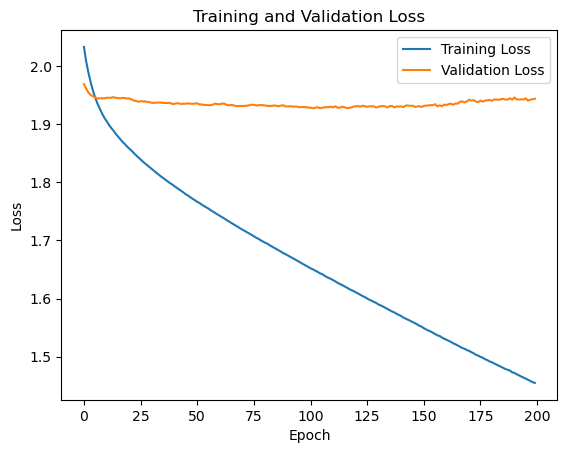

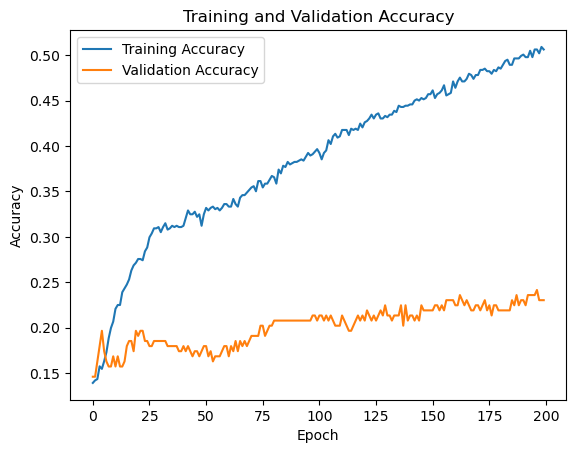

In [33]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
